In [1]:
#!/usr/bin/python2.7

from analysis_lib import *


#INLINE = False
INLINE = True
if INLINE:
  %matplotlib inline
else:
  matplotlib.use("Agg")


np.set_printoptions(precision=8, linewidth=999999999)

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In /opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /

In [2]:

#nmo, clsd, ndets, acti, nstates, natoms = 26, 7, 4, 2, 3, 6
#nmo, clsd, ndets, acti, nstates, natoms = 66, 18, 400, 6, 3, 12
#nmo, clsd, ndets, acti, nstates, natoms = 66, 19, 36, 4, 3, 12
# benzene wigner test

datas = [
 #plottables( "/home/adurden/conda/benzene/4_4_S1/", "Benzene"  ), 
 #plottables( "/home/adurden/conda/cpscf_series/reference/", "1e-13"  ), 
 #plottables( "/home/adurden/conda/cpscf_series/12_small_regularization/", "Small Reg."  ), 
 #plottables( "/home/adurden/conda/cpscf_series/12/", "1e-12"  ), 
 #plottables( "/home/adurden/conda/cpscf_series/fomofix_test/", "fix"  ), 
 #plottables( "/home/adurden/conda/cpscf_series/10/", "1e-10"  ), 
 #plottables( "/home/adurden/conda/cpscf_series/8/", "1e-8"  ), 
 #plottables( "/home/adurden/conda/cpscf_series/6/", "1e-6"  ), 
 #plottables( "/home/adurden/conda/cpscf_series/5/", "1e-5"  ),
 #plottables( "/home/adurden/conda/cpscf_series/smalltimestep_13/", "sm. 1e-13"  ), 
 #plottables( "/home/adurden/conda/cpscf_series/13_supersmall/", "sm. 1e-13"  ),
 #plottables( "/home/adurden/conda/benzene/wignertest/", "fine"  ), 
 #plottables( "/home/adurden/conda/benzene/wig2/", "coarse"  ), 
  plottables( "/home/adurden/conda/benzene/perturbed_S1/", "Benzene", DoStateProjections=True, DoSDiagnostic=False )
]

# If we have multiple datasets, align their relative energies with each other
if len(datas) > 1:
  min_e = min( [min(x) for x in [z.tot for z in datas] ]  )
  #print(min_e)
  for data in datas:
    data.reltot = [ (z-min_e)*27.2114 for z in data.tot ]



get_h5data runtime:   1.595556 seconds

init_params runtime:   0.064022 seconds

get_fomodata runtime:  10.661278 seconds

get_state_projections runtime:   7.852779 seconds

get_rmsgrad runtime:   3.890576 seconds

Total Benzene runtime:  24.071622 seconds



In [3]:
plt.clf()

# Window range in femtoseconds
start, end = 0, 100


for data in datas:
  data.starti, data.endi = data.fs2index_range(start,end)
  print((data.starti, data.endi))


#print((datas[0].starti, datas[0].endi))

(0, 598)


<Figure size 432x288 with 0 Axes>

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

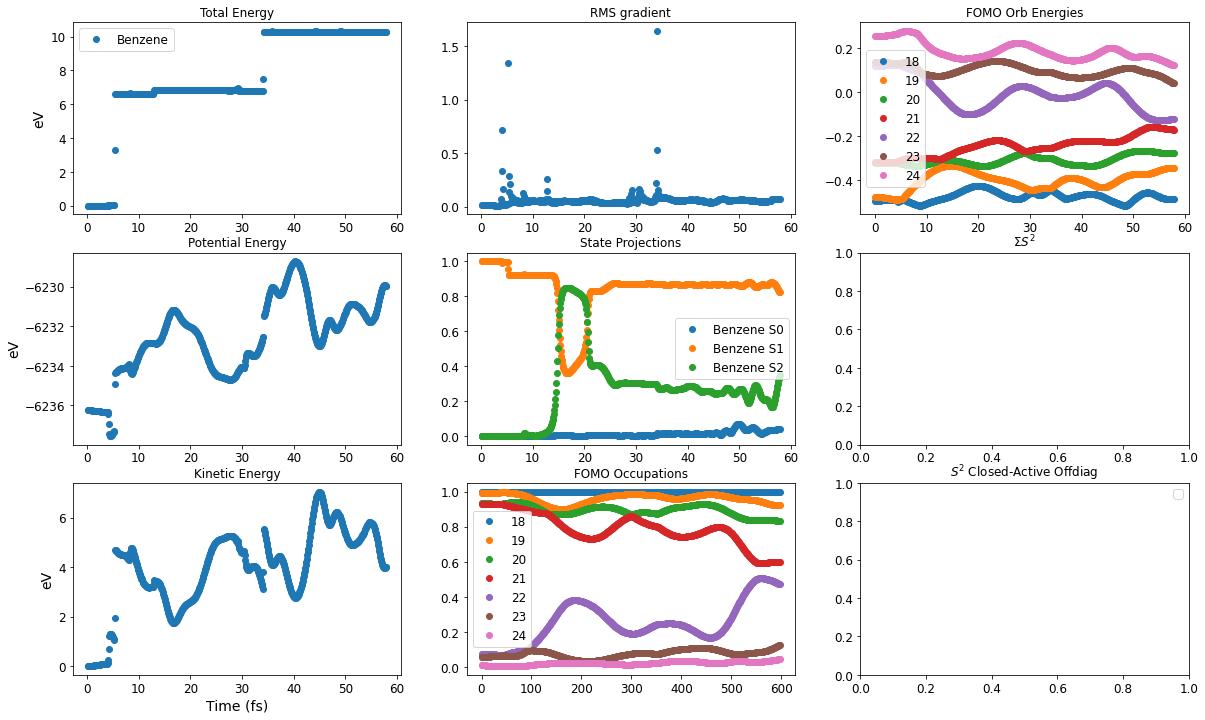

In [4]:

plt.clf()
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(20)
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(334)
ax3 = fig.add_subplot(337)
ax4 = fig.add_subplot(332)
ax8 = fig.add_subplot(335)
ax9 = fig.add_subplot(338)
ax7 = fig.add_subplot(333)
ax5 = fig.add_subplot(336)
ax6 = fig.add_subplot(339)
ax1.title.set_text('Total Energy')
for data in datas:
  ax1.plot(data.time[data.starti:data.endi], data.reltot[data.starti:data.endi], 'o', label=data.label)
ax1.legend()
ax1.set_ylabel("eV")

ax2.title.set_text('Potential Energy')
for data in datas:
  ax2.plot(data.time[data.starti:data.endi], data.pe[data.starti:data.endi], 'o', label=data.label)
ax2.set_ylabel("eV")

ax3.title.set_text('Kinetic Energy')
for data in datas:
  ax3.plot(data.time[data.starti:data.endi], data.ke[data.starti:data.endi], 'o', label=data.label)
ax3.set_ylabel("eV")
ax3.set_xlabel("Time (fs)")

ax4.title.set_text('RMS gradient')
for data in datas:
  ax4.plot(data.time[data.starti:data.endi], data.rmsgrad[data.starti:data.endi], 'o', label=data.label)

ax5.title.set_text(r"$\Sigma S^2$")
for data in datas:
  if data.DoSDiagnostic:
    ax5.plot(data.time[data.starti:data.endi], data.S_sq_actisum[data.starti:data.endi], 'o', label=data.label)

ax6.title.set_text(r"$S^2$ Closed-Active Offdiag")
for data in datas:
  if data.DoSDiagnostic:
    ax6.plot(data.time[data.starti:data.endi], data.S_sq_oos[data.starti:data.endi], 'o', label=data.label)
ax6.legend()                   

ax7.title.set_text("FOMO Orb Energies")
for data in datas:
  if data.DoFOMO:
    for i in range(data.clsd, data.clsd+data.acti+1):
      #ax7.plot(data.time[data.starti:data.endi], data.fomo_eng[i][data.starti:data.endi], 'o', label=data.label+' Orb '+str(i))
      ax7.plot(data.time[data.starti:data.endi], data.fomo_eng[i][data.starti:data.endi], 'o', label=str(i))
      pass
    #ax7.plot(data.time[data.starti:data.endi], (np.array(data.fomo_eng[20][data.starti:data.endi]) - np.array(data.fomo_eng[21][data.starti:data.endi])) , 'o')
ax7.legend()


ax9.title.set_text("FOMO Occupations")
for data in datas:
  if data.DoFOMO:
    for i in range(data.clsd, data.clsd+data.acti+1):
      #ax9.plot(data.time[data.starti:data.endi], data.fomo_occ[i][data.starti:data.endi], 'o', label=str(i))
      ax9.plot(range(data.starti,data.endi), data.fomo_occ[i][data.starti:data.endi], 'o', label=str(i))
      pass
ax9.legend()

ax8.title.set_text("State Projections")
for data in datas:
  if data.DoStateProjections:
    for i in range(0,data.nstates):
      ax8.plot(data.time[data.starti:data.endi], data.state_proj[i][data.starti:data.endi], 'o', label=data.label+' S'+str(i))
ax8.legend()

if INLINE:
  plt.show() 
else:
  plt.savefig(filename, dpi=255)

